LACOUX coline <br>
NARTZ Kévin 

### Projet MADMC 2020
# Sélection bi-objectifs avec coefficients intervalles

In [1]:
from algorithms import *
from experiments import *
import matplotlib.pyplot as plt
from utils import *
%load_ext autoreload
%autoreload 2

# Première procédure de résolution

In [12]:
# DATA
n = 5
k = 3
alpha_min = 0.1
alpha_max = 0.95
E = generate_vectors(n,10).astype(int)

In [13]:
minimax_sol, minimax_sol_i, pareto_front, pareto_front_i, P, I = two_phased_pareto(E, k, alpha_min, alpha_max)
print("Point minimax dans l'espace des objectifs : ", minimax_sol)
print("Objets séléctionnés: ", minimax_sol_i)

---- Première Phase ----
Progression: [####################] 100.0%
---- Seconde Phase ----
Progression: [####################] 100.0%
Point minimax dans l'espace des objectifs :  (24, 25)
Objets séléctionnés:  [0, 1, 2]


In [14]:
P

,0:[9 5],1:[6 7],2:[ 9 13],3:[10 11],4:[12 7]
Taille,,,,,
0,"[[0, 0]]","[[0, 0]]","[[0, 0]]","[[0, 0]]","[[0, 0]]"
1,"[[9, 5]]","[[6, 7], [9, 5]]","[[6, 7], [9, 5]]","[[6, 7], [9, 5]]","[[6, 7], [9, 5]]"
2,[],"[[15, 12]]","[[15, 12]]","[[15, 12]]","[[15, 12]]"
3,[],[],"[[24, 25]]","[[25, 23], [24, 25]]","[[27, 19], [25, 23], [24, 25]]"


In [15]:
I

,0:[9 5],1:[6 7],2:[ 9 13],3:[10 11],4:[12 7]
Taille,,,,,
0,[],[],[],[],[]
1,[[0]],"[[1], [0]]","[[1], [0]]","[[1], [0]]","[[1], [0]]"
2,[],"[[0, 1]]","[[0, 1]]","[[0, 1]]","[[0, 1]]"
3,[],[],"[[0, 1, 2]]","[[0, 1, 3], [0, 1, 2]]","[[0, 1, 4], [0, 1, 3], [0, 1, 2]]"


# Seconde procédure de résolution

On s'assure que la transformation est fiable en testant la réduction puis reconstruction sur 1000 vecteurs aléatoires

In [16]:
check_transform()

In [17]:
# DATA
alpha_min = 0.1
alpha_max = 0.8

In [18]:
minimax_sol_red, minimax_sol_i_red, pareto_front_red, pareto_front_i_red, P_red, I_red = two_phased_idominance(E, k, alpha_min, alpha_max)
print("Point minimax dans l'espace des objectifs : ", minimax_sol_red)
print("Objets séléctionnés: ", minimax_sol_i_red)

---- Première Phase ----
Progression: [####################] 100.0%
---- Seconde Phase ----
Progression: [####################] 100.0%
Point minimax dans l'espace des objectifs :  (25.0, 23.0)
Objets séléctionnés:  [0, 1, 3]


In [19]:
P_red

,0:[5.4 8.2],1:[6.9 6.2],2:[12.6 9.8],3:[10.9 10.2],4:[ 7.5 11. ]
Taille,,,,,
0,"[[0, 0]]","[[0, 0]]","[[0, 0]]","[[0, 0]]","[[0, 0]]"
1,"[[5.4, 8.2]]","[[6.9, 6.2], [5.4, 8.2]]","[[6.9, 6.2], [5.4, 8.2]]","[[6.9, 6.2], [5.4, 8.2]]","[[6.9, 6.2], [5.4, 8.2]]"
2,[],"[[12.3, 14.399999999999999]]","[[12.3, 14.399999999999999]]","[[12.3, 14.399999999999999]]","[[12.3, 14.399999999999999]]"
3,[],[],"[[24.900000000000002, 24.2]]","[[23.200000000000003, 24.599999999999998], [24...","[[19.8, 25.4], [23.200000000000003, 24.5999999..."


In [20]:
P_rec = reconstruct_P(P_red, alpha_min, alpha_max)
P_rec

,0:[5.4 8.2],1:[6.9 6.2],2:[12.6 9.8],3:[10.9 10.2],4:[ 7.5 11. ]
Taille,,,,,
0,"[[-0.0, -0.0]]","[[-0.0, -0.0]]","[[-0.0, -0.0]]","[[-0.0, -0.0]]","[[-0.0, -0.0]]"
1,"[[9.0, 5.0]]","[[6.0, 7.0], [9.0, 5.0]]","[[6.0, 7.0], [9.0, 5.0]]","[[6.0, 7.0], [9.0, 5.0]]","[[6.0, 7.0], [9.0, 5.0]]"
2,[],"[[15.0, 12.0]]","[[15.0, 12.0]]","[[15.0, 12.0]]","[[15.0, 12.0]]"
3,[],[],"[[24.0, 25.0]]","[[25.0, 23.0], [24.0, 25.0]]","[[27.0, 19.0], [25.0, 23.0], [24.0, 25.0]]"


In [21]:
I_red

,0:[5.4 8.2],1:[6.9 6.2],2:[12.6 9.8],3:[10.9 10.2],4:[ 7.5 11. ]
Taille,,,,,
0,[],[],[],[],[]
1,[[0]],"[[1], [0]]","[[1], [0]]","[[1], [0]]","[[1], [0]]"
2,[],"[[0, 1]]","[[0, 1]]","[[0, 1]]","[[0, 1]]"
3,[],[],"[[0, 1, 2]]","[[0, 1, 3], [0, 1, 2]]","[[0, 1, 4], [0, 1, 3], [0, 1, 2]]"


# Comparaison expérimentale des deux méthodes

# 1 - Visualisation

In [13]:
# DATA
n = 50
k = 2
alpha_min = 0.2
alpha_max = 0.7
E = generate_vectors(n,100)

all_sets = []
for y1_1,y1_2 in E:
    for y2_1,y2_2 in E:
        if y1_1!=y2_1 and y1_2!=y2_2:
            all_sets.append([y1_1+y2_1, y1_2+y2_2])
all_sets = np.array(all_sets)

In [20]:
print("--- PREMIERE METHODE ---")
minimax_sol1, minimax_sol_i1, front1, front_i1, P1, I1 = two_phased_pareto(E, k, alpha_min, alpha_max)
print("--- DEUXIEME METHODE ---")
minimax_sol2, minimax_sol_i2, front2, front_i2, P2, I2 = two_phased_idominance(E, k, 0.2, 0.7)

--- PREMIERE METHODE ---
---- Première Phase ----
Progression: [####################] 100.0%
---- Seconde Phase ----
Progression: [####################] 100.0%
--- DEUXIEME METHODE ---
---- Première Phase ----
Progression: [####################] 100.0%
---- Seconde Phase ----
Progression: [####################] 100.0%


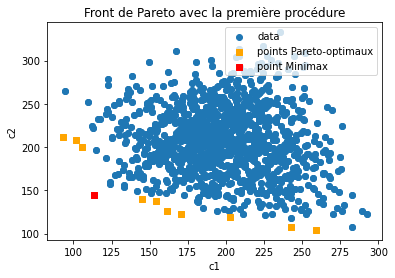

In [21]:
show_pareto_front(all_sets, front1, minimax=minimax_sol1, title="avec la première procédure")

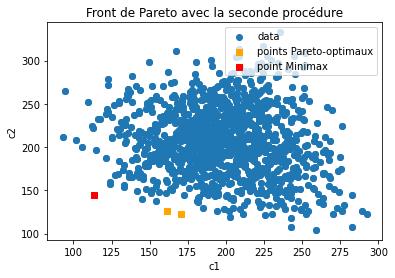

In [22]:
show_pareto_front(all_sets, front2, minimax=minimax_sol2, title="avec la seconde procédure")

On remarque que le front de Pareto est plus restreint avec la seconde procédure, cela est dû au fait que la I-dominance est plus stricte.

## Temps d'exécution

### En fonction de I=[alpha_min, alpha_max]

Progression: [####################] 100.0%


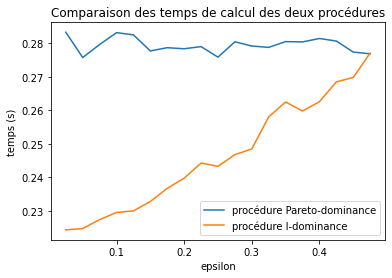

In [57]:
times_1_epsilon, times_2_epsilon = compare_procedures_epsilon(two_phased_pareto, two_phased_idominance, nb_iter=50)
np.savetxt('logs/times_pareto_eps.csv', times_1_epsilon, delimiter=',')
np.savetxt('logs/times_idominance_eps.csv', times_2_epsilon, delimiter=',')

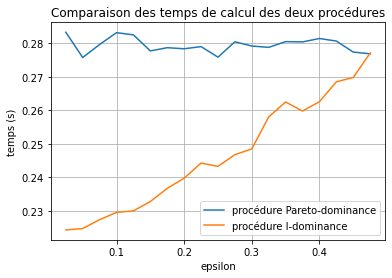

In [59]:
x = np.arange(0.025, 0.5, 0.025)
plt.figure()
plt.plot(x, times_1_epsilon, label='procédure Pareto-dominance')
plt.plot(x, times_2_epsilon, label="procédure I-dominance")
plt.title("Comparaison des temps de calcul des deux procédures")
plt.xlabel("epsilon")
plt.ylabel('temps (s)')
plt.grid(True,which="both")
plt.legend()
plt.show()

### En fonction de n

Progression: [####################] 100.0%


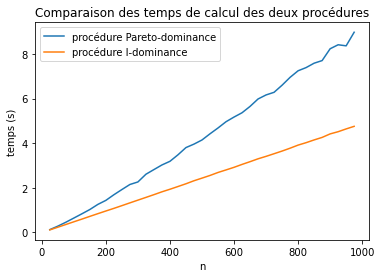

In [9]:
times_1_n, times_2_n = compare_procedures_n(two_phased_pareto, two_phased_idominance, alpha_min=0.45, alpha_max=0.55, nb_iter=30)
np.savetxt('logs/times_pareto_n.csv', times_1_n, delimiter=',')
np.savetxt('logs/times_idominance_n.csv', times_2_n, delimiter=',')

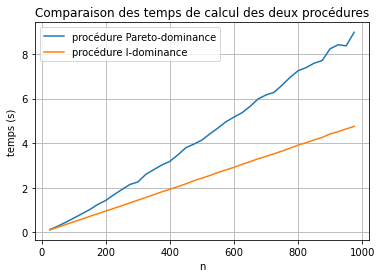

In [11]:
x = np.arange(25, 1000, 25)
plt.figure()
plt.plot(x, times_1_n, label='procédure Pareto-dominance')
plt.plot(x, times_2_n, label="procédure I-dominance")
plt.title("Comparaison des temps de calcul des deux procédures")
plt.xlabel("n")
plt.ylabel('temps (s)')
plt.grid(True,which="both")
plt.legend()
plt.show()

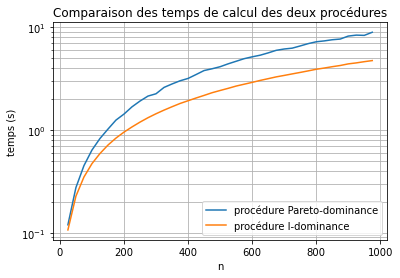

In [12]:
x = np.arange(25, 1000, 25)
plt.figure()
plt.plot(x, times_1_n, label='procédure Pareto-dominance')
plt.plot(x, times_2_n, label="procédure I-dominance")
plt.title("Comparaison des temps de calcul des deux procédures")
plt.xlabel("n")
plt.ylabel('temps (s)')
plt.yscale('log')
plt.grid(True,which="both")
plt.legend()
plt.show()